In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re

In [327]:
# 폰트설정
plt.rc("font", family='Malgun Gothic')

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

In [280]:
# !pip install xlrd

In [281]:
# !pip install openpyxl

In [282]:
with open('excel.xls', 'r', encoding='EUC-KR') as file:
    html_content = file.read()

In [283]:
# html_content

In [284]:
soup = BeautifulSoup(html_content, 'html.parser')
# print(soup.prettify())

In [285]:
# 뜬금 없지만 예제
tables = pd.read_html('https://finance.naver.com/', encoding='EUC-KR')
# tables[3]

In [410]:
# str(soup) : BeautifulSoup 객체를 문자열로 변환합니다.
# pd.read_html() : HTML 테이블을 DataFrame으로 읽어오기
tables = pd.read_html(str(soup))
print(len(tables))
# for table in tables:
#     display(table)

2


In [287]:
df = tables[1].iloc[2:]
df.columns = tables[1].iloc[1]
df.to_excel('lotto.xlsx', index=False)

In [288]:
df.describe()

1,년도,회차,추첨일,당첨자수,당첨금액,당첨자수,당첨금액,당첨자수,당첨금액,당첨자수,당첨금액,당첨자수,당첨금액,1,2,3,4,5,6,보너스
count,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113
unique,23,1113,1113,28,1100,108,1112,864,1112,1108,393,1113,2,29,35,38,38,35,28,45
top,2022,1113,2024.03.30,7,0원,33,0원,1228,"1,411,027원",62096,"50,000원",2444535,"5,000원",1,7,20,31,34,45,43
freq,53,1,1,130,14,34,2,5,2,2,713,1,1026,154,71,62,59,77,161,35


In [289]:
df.head(2)

1,년도,회차,추첨일,당첨자수,당첨금액,당첨자수,당첨금액,당첨자수,당첨금액,당첨자수,당첨금액,당첨자수,당첨금액,1,2,3,4,5,6,보너스
2,2024,1113,2024.03.30,14,"1,987,426,822원",57,"81,356,654원",2936,"1,579,472원",146997,"50,000원",2444535,"5,000원",11,13,20,21,32,44,8
3,2024,1112,2024.03.23,10,"2,804,455,650원",59,"79,221,912원",3077,"1,519,043원",148163,"50,000원",2461430,"5,000원",16,20,26,36,42,44,24


In [290]:
df.columns = ['년도', '회차', '추첨일', '1등 당첨자수', '1등 당첨금액', '2등 당첨자수', '2등 당첨금액', '3등 당첨자수', '3등 당첨금액',
       '4등 당첨자수', '4등 당첨금액', '5등 당첨자수', '5등 당첨금액', '1', '2', '3', '4', '5', '6', '보너스']

In [291]:
df.head(2)

,년도,회차,추첨일,1등 당첨자수,1등 당첨금액,2등 당첨자수,2등 당첨금액,3등 당첨자수,3등 당첨금액,4등 당첨자수,4등 당첨금액,5등 당첨자수,5등 당첨금액,1,2,3,4,5,6,보너스
2,2024,1113,2024.03.30,14,"1,987,426,822원",57,"81,356,654원",2936,"1,579,472원",146997,"50,000원",2444535,"5,000원",11,13,20,21,32,44,8
3,2024,1112,2024.03.23,10,"2,804,455,650원",59,"79,221,912원",3077,"1,519,043원",148163,"50,000원",2461430,"5,000원",16,20,26,36,42,44,24


In [292]:
df['추첨일'] = pd.to_datetime(df['추첨일'])

C:\Users\kh502\AppData\Local\Temp\ipykernel_9612\490869956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['추첨일'] = pd.to_datetime(df['추첨일'])


In [293]:
df.loc[:, '추첨일'] = pd.to_datetime(df['추첨일'])

In [294]:
# df.loc[:, '1등 당첨금액'] = df['1등 당첨금액'].str.replace('원', '').str.replace(',', '')
# df.loc[:, '2등 당첨금액'] = df['2등 당첨금액'].str.replace('원', '').str.replace(',', '')
# df.loc[:, '3등 당첨금액'] = df['3등 당첨금액'].str.replace('원', '').str.replace(',', '')
# df.loc[:, '4등 당첨금액'] = df['4등 당첨금액'].str.replace('원', '').str.replace(',', '')
# df.loc[:, '5등 당첨금액'] = df['5등 당첨금액'].str.replace('원', '').str.replace(',', '')

In [295]:
# # to_numeric() : int로 변환할지 flot으로 변환할지 자동으로
# for col in df.columns:
#     if '당첨' in col:
#         df[col] = pd.to_numeric(df[col])
# # 에러는 뜨지만 info()가 바뀜

In [296]:
# for col in df.columns:
#     if '당첨' in col:
#         df.loc[:, col] = df[col].apply(lambda x: pd.to_numeric(re.sub(r'[원,]','',str(x))))

In [297]:
# 특정컬럼을 제외
df.columns.difference(['년도', '회차', '추첨일'])

Index(['1', '1등 당첨금액', '1등 당첨자수', '2', '2등 당첨금액', '2등 당첨자수', '3', '3등 당첨금액',
       '3등 당첨자수', '4', '4등 당첨금액', '4등 당첨자수', '5', '5등 당첨금액', '5등 당첨자수', '6',
       '보너스'],
      dtype='object')

In [374]:
# 특정컬럼제외 숫자형 타입으로 변경하기 (최종)
for col in df.columns.difference(['년도', '회차', '추첨일']):
    df[col] = df[col].apply(lambda x: pd.to_numeric(re.sub(r'[원,]','',str(x))))

C:\Users\kh502\AppData\Local\Temp\ipykernel_9612\3434885796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x: pd.to_numeric(re.sub(r'[원,]','',str(x))))
C:\Users\kh502\AppData\Local\Temp\ipykernel_9612\3434885796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x: pd.to_numeric(re.sub(r'[원,]','',str(x))))
C:\Users\kh502\AppData\Local\Temp\ipykernel_9612\3434885796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [375]:
df.dtypes

년도                  int64
회차                 object
추첨일        datetime64[ns]
1등 당첨자수             int64
1등 당첨금액             int64
2등 당첨자수             int64
2등 당첨금액             int64
3등 당첨자수             int64
3등 당첨금액             int64
4등 당첨자수             int64
4등 당첨금액             int64
5등 당첨자수             int64
5등 당첨금액             int64
1                   int64
2                   int64
3                   int64
4                   int64
5                   int64
6                   int64
보너스                 int64
dtype: object

In [300]:
df

,년도,회차,추첨일,1등 당첨자수,1등 당첨금액,2등 당첨자수,2등 당첨금액,3등 당첨자수,3등 당첨금액,4등 당첨자수,4등 당첨금액,5등 당첨자수,5등 당첨금액,1,2,3,4,5,6,보너스
2,2024,1113,2024-03-30,14,1987426822,57,81356654,2936,1579472,146997,50000,2444535,5000,11,13,20,21,32,44,8
3,2024,1112,2024-03-23,10,2804455650,59,79221912,3077,1519043,148163,50000,2461430,5000,16,20,26,36,42,44,24
4,2024,1111,2024-03-16,16,1714662540,97,47138490,5096,897260,171363,50000,2608760,5000,3,13,30,33,43,45,4
5,2024,1110,2024-03-09,16,1647392719,118,37229214,3654,1202258,173234,50000,2747163,5000,3,7,11,20,22,41,24
6,2024,1109,2024-03-02,17,1584352875,84,53440474,3347,1341202,180255,50000,2734683,5000,10,12,13,19,33,40,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,2003,5,2003-01-04,0,0,0,0,42,6033800,3043,166500,60434,10000,16,24,29,40,41,42,3
1111,2002,4,2002-12-28,0,0,1,211191200,29,7282400,2777,152100,52382,10000,14,27,30,31,40,42,2
1112,2002,3,2002-12-21,1,2000000000,0,0,139,1174100,5940,54900,73256,10000,11,16,19,21,27,31,30
1113,2002,2,2002-12-14,1,2002006800,2,94866800,103,1842000,3763,100800,55480,10000,9,13,21,25,32,42,2


In [302]:
# df.describe()

In [303]:
df.describe().style.format('{:.2f}')

,추첨일,1등 당첨자수,1등 당첨금액,2등 당첨자수,2등 당첨금액,3등 당첨자수,3등 당첨금액,4등 당첨자수,4등 당첨금액,5등 당첨자수,5등 당첨금액,1,2,3,4,5,6,보너스
count,1113.00,1113.00,1113.00,1113.00,1113.00,1113.00,1113.00,1113.00,1113.00,1113.00,1113.00,1113.00,1113.00,1113.00,1113.00,1113.00,1113.00,1113.00
mean,.2f,7.82,2687568924.45,47.44,63636596.10,1795.09,1591782.16,88019.82,57603.27,1442125.04,5390.84,6.72,13.12,20.01,26.30,32.89,39.57,22.45
min,.2f,0.00,0.00,0.00,0.00,28.00,627634.00,2537.00,27300.00,40155.00,5000.00,1.00,2.00,3.00,5.00,9.00,18.00,1.00
25%,.2f,5.00,1558378334.00,33.00,48989132.00,1284.00,1352809.00,63699.00,50000.00,1053545.00,5000.00,3.00,8.00,14.00,21.00,28.00,37.00,11.00
50%,.2f,7.00,2077279594.00,43.00,57195890.00,1626.00,1480560.00,78522.00,50000.00,1301184.00,5000.00,5.00,12.00,19.00,27.00,34.00,41.00,23.00
75%,.2f,10.00,3051105610.00,59.00,67078288.00,2230.00,1606882.00,108450.00,56807.00,1770017.00,5000.00,10.00,18.00,26.00,32.00,38.00,44.00,34.00
max,.2f,50.00,40722959400.00,664.00,769456500.00,11247.00,9307100.00,703234.00,260000.00,3410846.00,10000.00,35.00,37.00,40.00,43.00,44.00,45.00,45.00
std,nan,4.42,2441747295.93,27.75,37555620.84,746.43,653012.58,36717.77,20636.93,515685.75,1342.78,5.33,6.88,7.43,7.53,6.83,5.26,13.23


In [305]:
# df['1'].plot.hist()

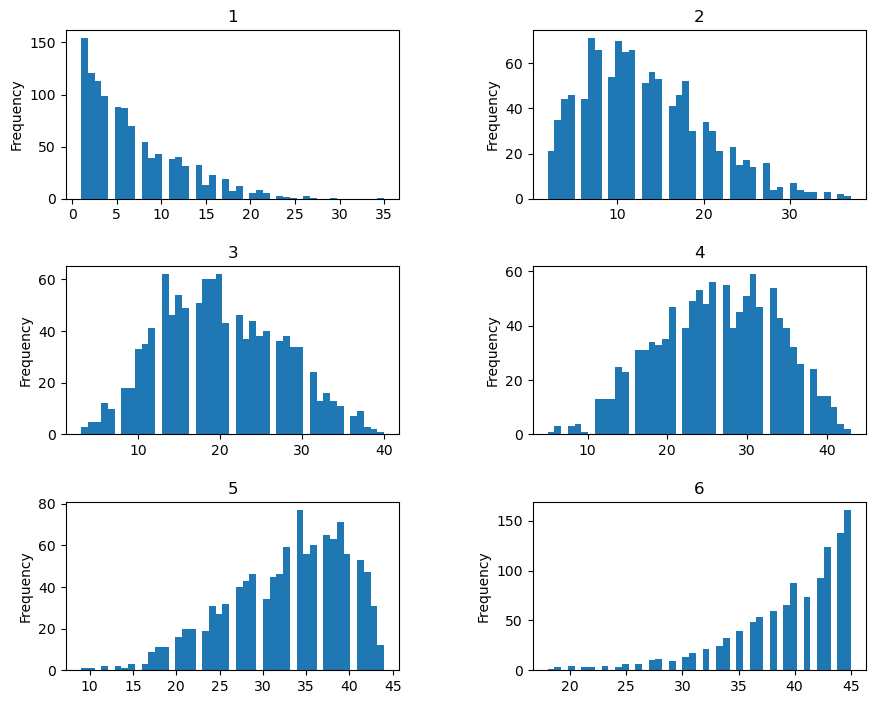

In [322]:
fig, axs = plt.subplots(3, 2, figsize=(10, 8))
df['1'].plot.hist(ax=axs[0,0], title='1', bins=45)
df['2'].plot.hist(ax=axs[0,1], title='2', bins=45)
df['3'].plot.hist(ax=axs[1,0], title='3', bins=45)
df['4'].plot.hist(ax=axs[1,1], title='4', bins=45)
df['5'].plot.hist(ax=axs[2,0], title='5', bins=45)
df['6'].plot.hist(ax=axs[2,1], title='6', bins=45)
# axs[0, 0].hist(df['1'])
# axs[0, 1].hist(df['2'])
# axs[1, 0].hist(df['3'])
# axs[1, 1].hist(df['4'])
# axs[2, 0].hist(df['5'])
# axs[2, 1].hist(df['6'])
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4) # 간격주기
plt.show()

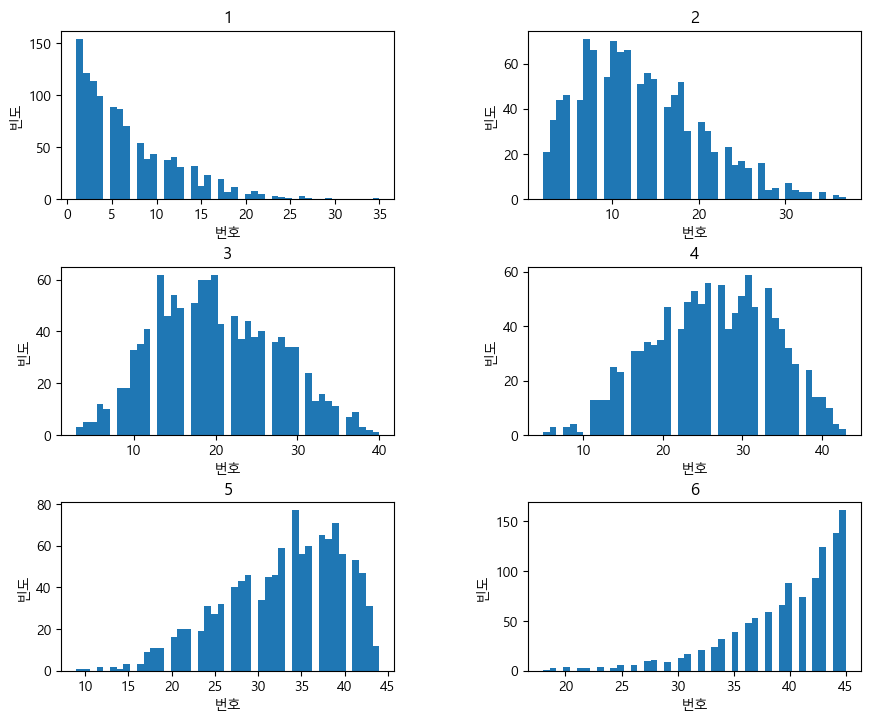

In [329]:
fig, axs = plt.subplots(3, 2, figsize=(10, 8))
axs[0, 0].hist(df['1'], bins=45)
axs[0, 1].hist(df['2'], bins=45)
axs[1, 0].hist(df['3'], bins=45)
axs[1, 1].hist(df['4'], bins=45)
axs[2, 0].hist(df['5'], bins=45)
axs[2, 1].hist(df['6'], bins=45)

axs[0, 0].set_title('1')
axs[0, 0].set_xlabel('번호')
axs[0, 0].set_ylabel('빈도')
axs[0, 1].set_title('2')
axs[0, 1].set_xlabel('번호')
axs[0, 1].set_ylabel('빈도')
axs[1, 0].set_title('3')
axs[1, 0].set_xlabel('번호')
axs[1, 0].set_ylabel('빈도')
axs[1, 1].set_title('4')
axs[1, 1].set_xlabel('번호')
axs[1, 1].set_ylabel('빈도')
axs[2, 0].set_title('5')
axs[2, 0].set_xlabel('번호')
axs[2, 0].set_ylabel('빈도')
axs[2, 1].set_title('6')
axs[2, 1].set_xlabel('번호')
axs[2, 1].set_ylabel('빈도')
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4) # 간격주기
plt.show()

In [380]:
df.groupby('년도')['1등 당첨자수'].sum().to_frame().reset_index()

,년도,1등 당첨자수
0,2002,2
1,2003,209
2,2004,252
3,2005,341
4,2006,302
5,2007,302
6,2008,285
7,2009,295
8,2010,291
9,2011,366


<Axes: xlabel='년도'>

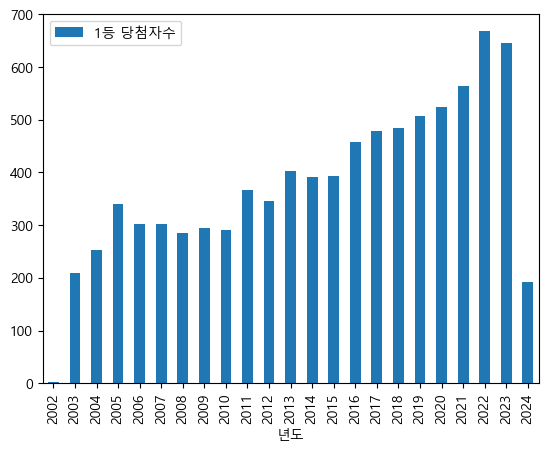

In [383]:
df.groupby('년도')['1등 당첨자수'].sum().to_frame().reset_index().plot.bar('년도', '1등 당첨자수')

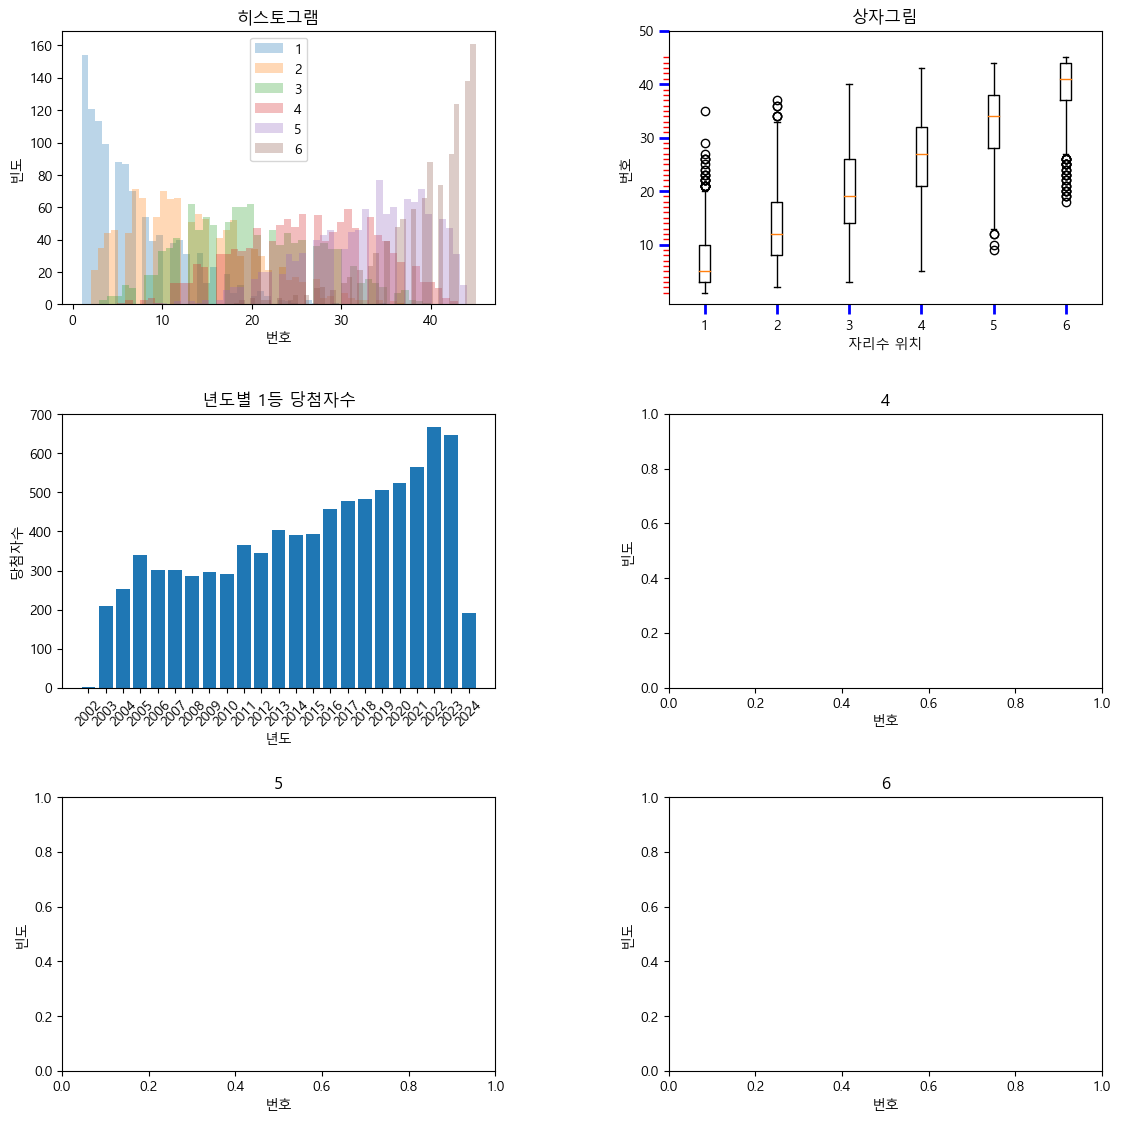

In [395]:
fig, axs = plt.subplots(3, 2, figsize=(13, 13))
# 첫 번째 서브플롯: 히스토그램 및 범례
# axs[0, 0].hist(df['1'], bins=45, alpha=0.5, label='1')
# axs[0, 0].hist(df['2'], bins=45, alpha=0.5, label='2')
# axs[0, 0].hist(df['3'], bins=45, alpha=0.5, label='3')
for i in range(1, 7):
    axs[0, 0].hist(df[str(i)], bins=45, alpha=0.3, label=str(i))
axs[0, 0].legend() # 범례
axs[0, 0].set_title('히스토그램')
axs[0, 0].set_xlabel('번호')
axs[0, 0].set_ylabel('빈도')

# 두 번째 서브플롯: 상자그림(Boxplot)
for i in range(1, 7):  # 변수 '1'부터 '6'까지 반복
    axs[0, 1].boxplot(df[str(i)], positions=[i], labels=[str(i)])
axs[0, 1].set_title('상자그림')
axs[0, 1].set_xlabel('자리수 위치')
axs[0, 1].set_ylabel('번호')
# axs[0, 1].set_xticks([1, 2, 3, 4, 5, 6]) # x축 주눈금
axs[0, 1].set_yticks([10, 20, 30, 40, 50]) # y축 주눈금
axs[0, 1].set_yticks(np.arange(1,45+1), minor=True) # y축 부눈금
axs[0, 1].tick_params(which='major', length=7, width=2, color='blue') # 주눈금 스타일
axs[0, 1].tick_params(which='minor', length=4, width=1, color='red') # 부눈금 스타일

# 세 번째 서브플롯 : bar차트
data = df.groupby('년도')['1등 당첨자수'].sum().reset_index()
axs[1, 0].bar(data['년도'], data['1등 당첨자수'])
axs[1, 0].set_title('년도별 1등 당첨자수')
axs[1, 0].set_xlabel('년도')
axs[1, 0].set_ylabel('당첨자수')
axs[1, 0].tick_params(axis='x', rotation=45) # x축 라벨 45도
years = range(2002, 2025)
axs[1, 0].set_xticks(years) # 축 주눈금




axs[1, 1].set_title('4')
axs[1, 1].set_xlabel('번호')
axs[1, 1].set_ylabel('빈도')
axs[2, 0].set_title('5')
axs[2, 0].set_xlabel('번호')
axs[2, 0].set_ylabel('빈도')
axs[2, 1].set_title('6')
axs[2, 1].set_xlabel('번호')
axs[2, 1].set_ylabel('빈도')


plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4) # 간격주기
plt.show()

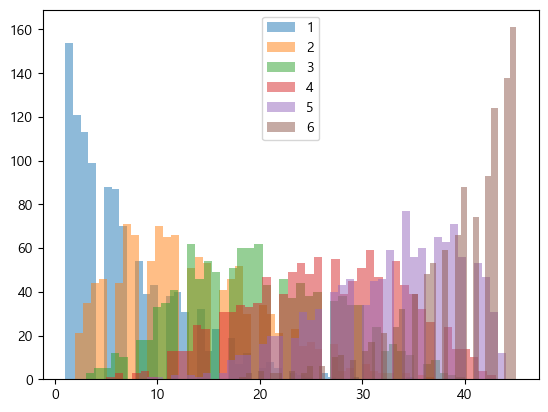

In [344]:
plt.hist(df['1'], bins=45, alpha=0.5, label='1')
plt.hist(df['2'], bins=45, alpha=0.5, label='2')
plt.hist(df['3'], bins=45, alpha=0.5, label='3')
plt.hist(df['4'], bins=45, alpha=0.5, label='4')
plt.hist(df['5'], bins=45, alpha=0.5, label='5')
plt.hist(df['6'], bins=45, alpha=0.5, label='6')


# 범례 추가
plt.legend()

plt.show()

In [412]:
[ df[str(i)].value_counts(normalize=True)*100 for i in range(1,6+1) ]

[1
 1     13.836478
 2     10.871518
 3     10.152740
 4      8.894879
 5      7.906559
 6      7.816712
 7      6.289308
 8      4.851752
 10     3.863432
 12     3.593890
 9      3.504043
 11     3.414196
 14     2.875112
 13     2.785265
 16     2.066487
 17     1.707098
 15     1.168014
 19     1.078167
 21     0.718778
 18     0.628931
 20     0.449236
 22     0.449236
 23     0.269542
 26     0.269542
 24     0.179695
 27     0.089847
 29     0.089847
 25     0.089847
 35     0.089847
 Name: proportion, dtype: float64,
 2
 7     6.379155
 10    6.289308
 12    5.929919
 8     5.929919
 11    5.840072
 14    5.031447
 9     4.851752
 15    4.761905
 18    4.672058
 13    4.582210
 5     4.132974
 17    4.132974
 4     3.953279
 6     3.953279
 16    3.683738
 3     3.144654
 20    3.054807
 19    2.695418
 21    2.695418
 23    2.066487
 2     1.886792
 22    1.886792
 25    1.527403
 27    1.437556
 24    1.347709
 26    1.257862
 30    0.628931
 29    0.449236
 31    0.359389
 2

In [405]:
[ np.random.choice([1, 2, 3], p=[0.7, 0.2, 0.1]) for i in range(1, 10+1) ]

[1, 1, 1, 1, 1, 1, 1, 2, 1, 2]